# Visualizing the mouse behavior

In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import tree as Tree
import sklearn.tree
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

In [13]:
'''
load in trial data
'''
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward Given']

root_dir = '/Users/shayneufeld/GitHub/mouse_bandit/data/70_30_trial_data'

trial_7030_df = pd.DataFrame(columns=columns)
trial_7030_list = []

for file in os.listdir(root_dir):
    if not file[0] == '.':
        file_name = os.path.join(root_dir,file)
        trial_7030_df = trial_7030_df.append(pd.read_csv(file_name,names=columns))
        trial_7030_list.append(pd.read_csv(file_name,names=columns))

# p(choose higher p port)

In [14]:
np.sum(trial_7030_df[trial_7030_df['Left Reward Prob'] == 0.7]['Port Poked'] == 2)

4910

In [15]:
# right rewards

pleft = np.sum(trial_7030_df[trial_7030_df['Left Reward Prob'] == 0.7]['Port Poked'] == 2).astype('float') / trial_7030_df[trial_7030_df['Left Reward Prob'] == 0.7].shape[0]
rleft = np.sum(trial_7030_df[trial_7030_df['Right Reward Prob'] == 0.7]['Port Poked'] == 1).astype('float') / trial_7030_df[trial_7030_df['Right Reward Prob'] == 0.7].shape[0]

print(pleft)
print(rleft)

0.729244021981
0.758695652174


In [16]:
p_high_7030 = np.zeros(len(trial_7030_list))

for i,s in enumerate(trial_7030_list):
    numerator = np.sum(s[s['Left Reward Prob'] == 0.7]['Port Poked'] == 2).astype('float') + np.sum(s[s['Right Reward Prob'] == 0.7]['Port Poked'] == 1).astype('float')
    denom = s[s['Left Reward Prob'] == 0.7].shape[0] + s[s['Right Reward Prob'] == 0.7].shape[0] 
    
    p_high_7030[i] = numerator / denom

In [17]:
p_high_7030

array([ 0.79883382,  0.78306878,  0.41001855,  0.74860335,  0.73809524,
        0.81493002,  0.82120253,  0.78004535,  0.75197889,  0.8027735 ,
        0.74874372,  0.70704225,  0.74489796,  0.78428094,  0.78202995,
        0.75250836,  0.85625   ,  0.61262799,  0.75      ,  0.76633987,
        0.67727273,  0.70639535,  0.79696133,  0.70673077,  0.73905429,
        0.73584906])

I see - some mice are shitty. We only want well behaving mice. Let's look at that for 80-20 as well:

In [118]:
'''
load in trial data
'''
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward Given']

root_dir = '/Users/shayneufeld/GitHub/mouse_bandit/data/80_20_trial_data/dumble_harry'

trial_8020_df = pd.DataFrame(columns=columns)
trial_8020_list = []

for file in os.listdir(root_dir):
    if not file[0] == '.':
        file_name = os.path.join(root_dir,file)
        trial_8020_df = trial_8020_df.append(pd.read_csv(file_name,names=columns))
        trial_8020_list.append(pd.read_csv(file_name,names=columns))

In [119]:
p_high_8020 = np.zeros(len(trial_8020_list))
p_actual = np.zeros(len(trial_8020_list))

for i,s in enumerate(trial_8020_list):
    numerator = np.sum(s[s['Left Reward Prob'] == 0.8]['Port Poked'] == 2).astype('float') + np.sum(s[s['Right Reward Prob'] == 0.8]['Port Poked'] == 1).astype('float')
    denom = s[s['Left Reward Prob'] == 0.8].shape[0] + s[s['Right Reward Prob'] == 0.8].shape[0] 
    
    p_high_8020[i] = numerator / denom

In [120]:
p_high_8020

array([ 0.82226212,  0.82786885,  0.79785605,  0.84955752,  0.83308042,
        0.86068111,  0.80185185,  0.82664234,  0.82901554,  0.85785124,
        0.81923077,  0.88475836,  0.85447761,  0.83065954,  0.88820827,
        0.79310345,  0.83760684,  0.81154499,  0.88428325,  0.83304042])

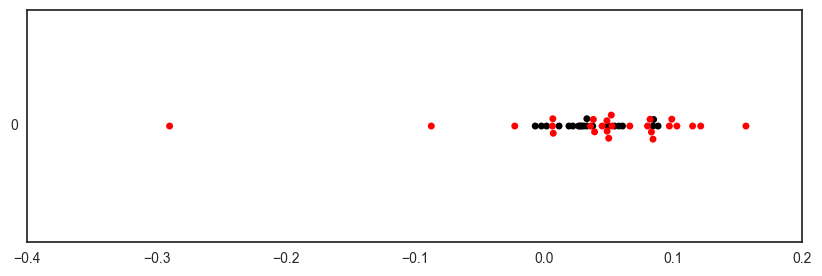

In [121]:
plt.figure(figsize=(10,3))
sns.swarmplot(data=p_high_8020-0.8,color='black',orient='h')
sns.swarmplot(data=p_high_7030-0.7,color='red',orient='h')

([<matplotlib.axis.XTick at 0x1159c68d0>,
 <a list of 3 Text xticklabel objects>)

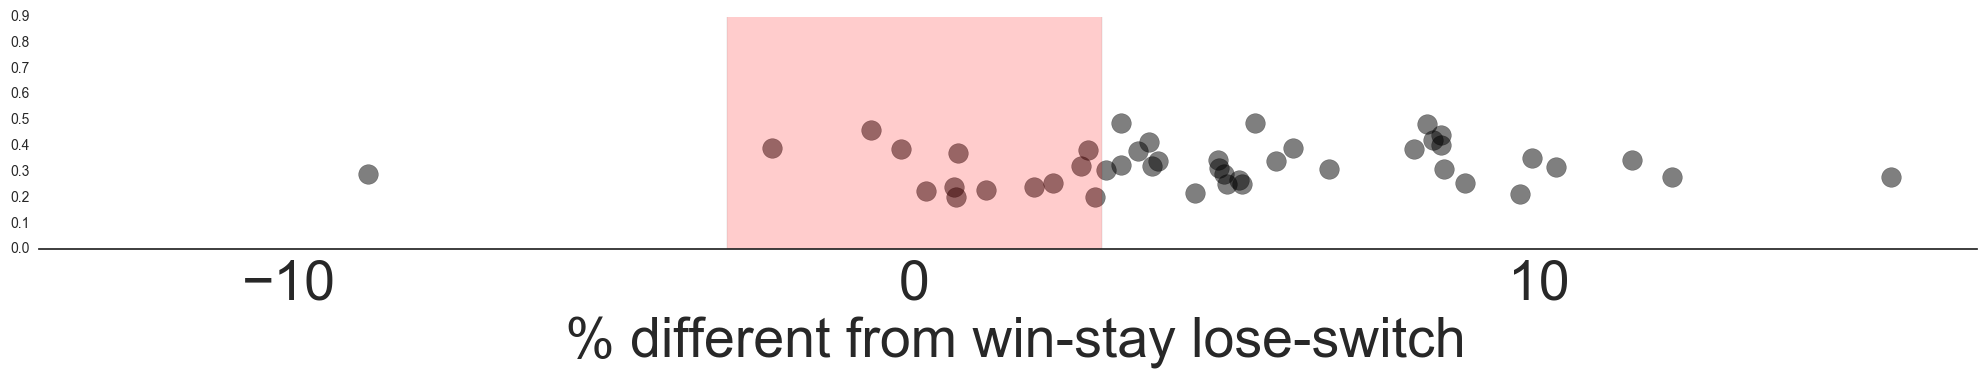

In [122]:
sns.set_style('white')
plt.figure(figsize=(25,3))
plt.scatter((p_high_8020-0.8)*100.0,np.random.uniform(low=0.2,high=0.5,size=p_high_8020.shape),color='black',s=200,alpha=0.5)
plt.scatter((p_high_7030-0.7)*100.0,np.random.uniform(low=0.2,high=0.5,size=p_high_7030.shape),color='black',s=200,alpha=0.5)
plt.ylim(-0,0.9)
plt.xlim(-14,17)
plt.bar(left=-3,height=1,width=6,color='red',alpha=0.2)
plt.xlabel(' % different from win-stay lose-switch',fontsize=40)
sns.despine(left='True')
plt.xticks([-10,0,10],fontsize=40)


# Divide data into 'high' and 'low' performance (wrt win-stay lose-switch)

In [123]:
p_high_8020

array([ 0.82226212,  0.82786885,  0.79785605,  0.84955752,  0.83308042,
        0.86068111,  0.80185185,  0.82664234,  0.82901554,  0.85785124,
        0.81923077,  0.88475836,  0.85447761,  0.83065954,  0.88820827,
        0.79310345,  0.83760684,  0.81154499,  0.88428325,  0.83304042])

In [132]:
trials_high_8020 = pd.DataFrame(columns=columns)
trials_low_8020 = pd.DataFrame(columns=columns)

for i,p in enumerate(p_high_8020):
    
    if p > 0.85:
        trials_high_8020 = trials_high_8020.append(trial_8020_list[i])
    else:
        trials_low_8020 = trials_low_8020.append(trial_8020_list[i])

In [133]:
trials_high_7030 = pd.DataFrame(columns=columns)
trials_low_7030 = pd.DataFrame(columns=columns)

for i,p in enumerate(p_high_7030):
    
    if p > 0.75:
        trials_high_7030 = trials_high_7030.append(trial_7030_list[i])
    else:
        trials_low_7030 = trials_low_7030.append(trial_7030_list[i])

In [126]:
trials_high_8020.shape

(3557, 7)

In [127]:
trials_high_7030.shape

(7267, 7)

In [134]:
trials_high = trials_high_8020.append(trials_high_7030)
trials_low = trials_low_8020.append(trials_low_7030)

In [135]:
#column names for feature matrix:
feature_names = ['Previous_10_Left_Choice','Previous_10_Right_Choice','Previous_10_Left_Reward',
                 'Previous_10_Right_Reward','Streak','5_Port','5_Reward','5_ITI','5_trialDuration',
                 '4_Port','4_Reward','4_ITI','4_trialDuration','3_Port','3_Reward','3_ITI',
                 '3_trialDuration','2_Port','2_Reward','2_ITI','2_trialDuration','1_Port','1_Reward',
                 '1_ITI','1_trialDuration','0_ITI','0_trialDuration','Decision'
                 ]

In [136]:
high_feature_matrix = bp.create_feature_matrix(trials_high,10,5,feature_names)
low_feature_matrix = bp.create_feature_matrix(trials_low,10,5,feature_names)

In [137]:
high_feature_matrix.to_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/high_master_df.csv')
low_feature_matrix.to_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/low_master_df.csv')